In [43]:
import pylab
import imageio
from matplotlib import pyplot as plt
import numpy as np
import skimage
from matplotlib import animation
%matplotlib inline


# 使用animate在jupyter上顯示影片

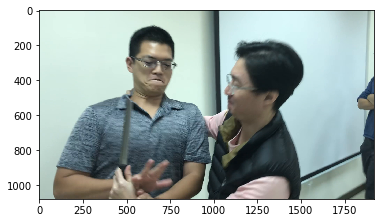

In [92]:
#视频的绝对路径
filename = './mv3.mp4'
#可以选择解码工具
vid = imageio.get_reader(filename,  'ffmpeg')

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()

im = plt.imshow(vid.get_data(0), animated=True)

# initialization function: plot the background of each frame
def init():
    im.set_array(test)
    return im,

# animation function.  This is called sequentially
def animate(i):
    image = vid.get_next_data()
    image = skimage.img_as_float(image).astype(np.float32)
    im.set_array(image)
    return im,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=200, interval=20, blit=True)
HTML(anim.to_html5_video())

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# Display stream from cam

In [75]:
from matplotlib import animation
from IPython.display import HTML, clear_output, display
import IPython
from io import StringIO, BytesIO
import PIL
import time

In [55]:
def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()
    
    #flip image for natural viewing
    frame = cv2.flip(frame, 1)
    
    return frame

In [76]:
def showarray(a, fmt='jpeg'):
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [95]:
cam = cv2.VideoCapture("./mv3.mp4")
try:
    while(True):
        # Capture frame-by-frame
        frame = get_frame(cam)

        # Convert the image from OpenCV BGR format to matplotlib RGB format
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # to display the image
        showarray(frame)
        
        # Display the frame until new frame is available
        clear_output(wait=True)
    print("%f FPS" % (1/(t2-t1)))
        
except KeyboardInterrupt:
    cam.release()
    print("Stream stopped")

error: OpenCV(3.4.3) /home/conda/feedstock_root/build_artifacts/opencv_1537056344807/work/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
